In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
url = 'https://gitlab.procc.fiocruz.br/mave/repo/-/raw/master/Dados/InfoGripe/dados_semanais_faixa_etaria_sexo_virus_sem_filtro_sintomas.csv'
full_df = pd.read_csv(url, sep=';', decimal=',')

In [3]:
full_df.head()

,data de publicação,UF,Unidade da Federação,Tipo,dado,escala,sexo,Ano epidemiológico,Semana epidemiológica,Ano e semana epidemiológica,...,Casos sem informação laboratorial,Casos sem teste laboratorial,Influenza A,Influenza B,SARS-CoV-2,Vírus sincicial respiratório (VSR),Parainfluenza 1,Parainfluenza 2,Parainfluenza 3,Adenovirus
0,2020-05-18,11,Rondônia,Estado,srag,incidência,F,2009,1,2009W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-05-18,11,Rondônia,Estado,srag,incidência,M,2009,1,2009W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-05-18,11,Rondônia,Estado,srag,incidência,Total,2009,1,2009W01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-05-18,11,Rondônia,Estado,srag,incidência,F,2009,2,2009W02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-05-18,11,Rondônia,Estado,srag,incidência,M,2009,2,2009W02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
full_df.columns

Index(['data de publicação', 'UF', 'Unidade da Federação', 'Tipo', 'dado',
       'escala', 'sexo', 'Ano epidemiológico', 'Semana epidemiológica',
       'Ano e semana epidemiológica', 'Situação do dado',
       'Total reportado até a última atualização', 'Idade desconhecida',
       '< 2 anos', '0-4 anos', '10-19 anos', '2-4 anos', '20-29 anos',
       '30-39 anos', '40-49 anos', '5-9 anos', '50-59 anos', '60+ anos',
       'Testes positivos', 'Testes negativos', 'Casos aguardando resultado',
       'Casos sem informação laboratorial', 'Casos sem teste laboratorial',
       'Influenza A', 'Influenza B', 'SARS-CoV-2',
       'Vírus sincicial respiratório (VSR)', 'Parainfluenza 1',
       'Parainfluenza 2', 'Parainfluenza 3', 'Adenovirus'],
      dtype='object')

In [61]:
def plot_state(s, ax, h=52):
    df = full_df.copy()
    df = df[df['sexo']=='Total']
    df = df[df['Unidade da Federação']==s]
    df = df[df['escala']=='casos']
    obitos = df[df['dado']=='obito']
    obitos_covid = df[df['dado']=='obitocovid']

    y = 2019
    while y>=2016:
        df = obitos[obitos['Ano epidemiológico']==y].copy()
        series = df['Testes negativos']
        series.index = df['Semana epidemiológica'].astype(str)
        ax = series.head(h).plot(label=y,ax=ax)
        y -= 1
    
    df_2020 = obitos[obitos['Ano epidemiológico']==2020]
    df_2020 = df_2020.head(h)
    df_2020.index = df_2020['Semana epidemiológica'].astype(str)
    
    series = obitos_covid['SARS-CoV-2'].head(h)
    series.index = obitos_covid['Semana epidemiológica']
    
    df_2020['obitos_covid'] = series.values
    df_2020.plot.bar(y=['Testes negativos', 'obitos_covid'], label=['2020, agente não espec.','2020, Covid-19'], ax=ax)
    ax.legend()
    ax.set_title(s)
    ax.set_xlabel('Semana epidemiológica de início dos sintomas')

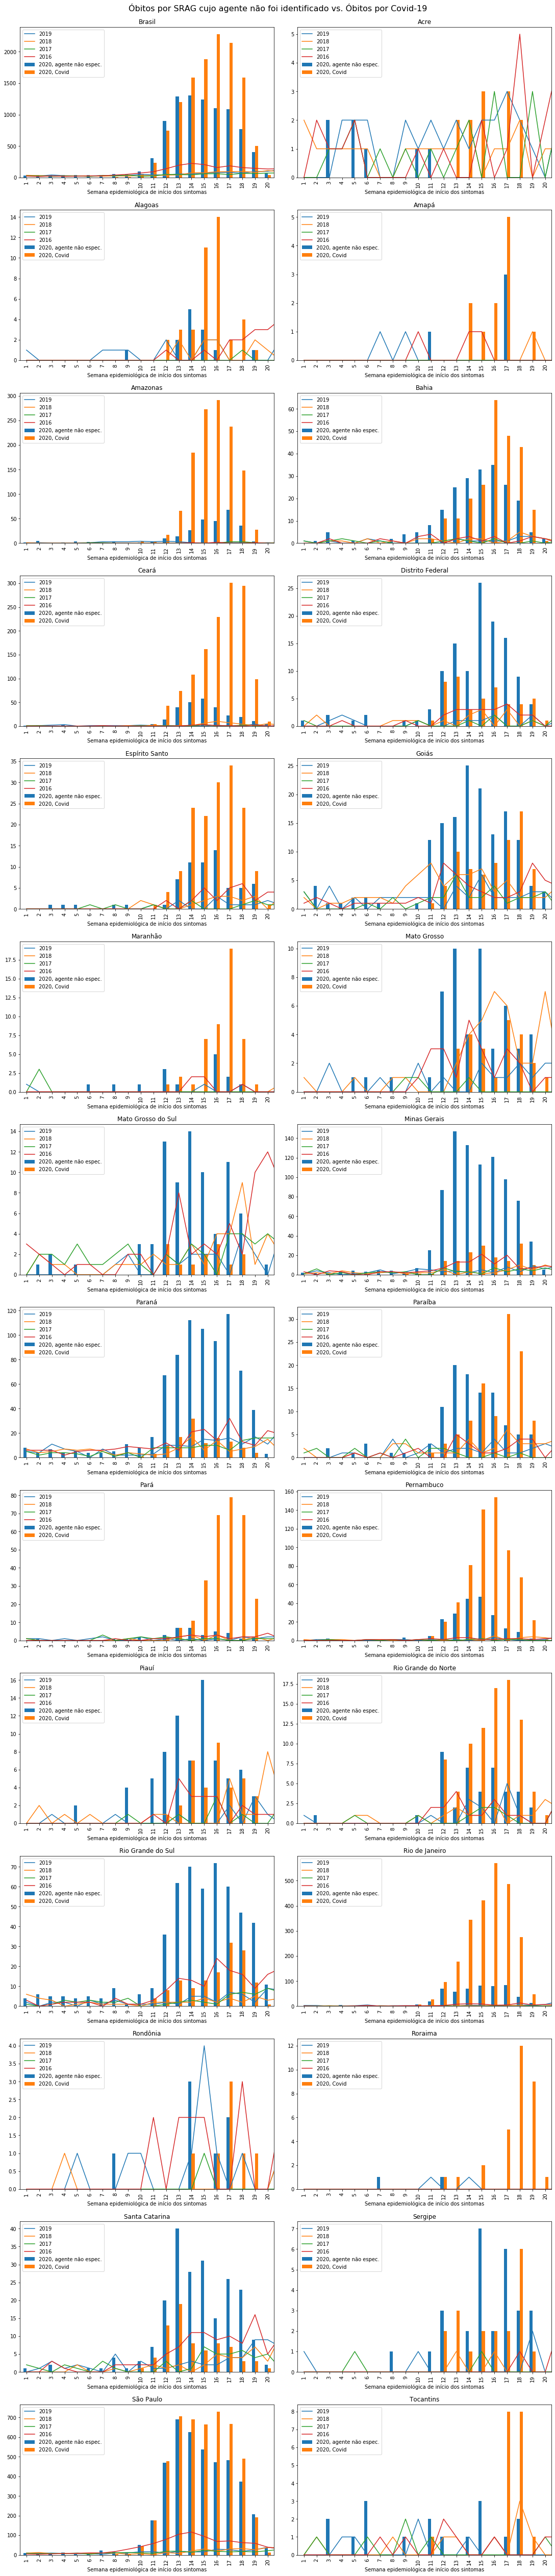

In [62]:
ncols = 2
nrows = 14

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5), constrained_layout=True)
state_names = ['Brasil'] + list(full_df[full_df['Tipo']=='Estado']['Unidade da Federação'].drop_duplicates().sort_values())
for i,s in enumerate(state_names):
    plot_state(s, axes.flat[i])
fig.suptitle('Óbitos por SRAG sem agente especificado vs. Óbitos por Covid-19', fontsize=16);

In [21]:
#WIP
def plot_subnotif(s, ax, h=20):
    df = full_df.copy()
    df = df[df['sexo']=='Total']
    df = df[df['Unidade da Federação']==s]
    df = df[df['escala']=='casos']
    obitos = df[df['dado']=='obito']
    obitos_covid = df[df['dado']=='obitocovid']

    y = 2020
    
    df = obitos[obitos['Ano epidemiológico']==2020]
    misterio = df['Testes negativos'].cumsum()
    misterio.index = df['Semana epidemiológica']

    covid = obitos_covid['SARS-CoV-2'].cumsum()
    covid.index = obitos_covid['Semana epidemiológica']
    
    subnotif = covid / (misterio + covid)
    subnotif.head(h).plot(ax=ax)
    ax.legend()
    ax.set_title(s)
    ax.set_ylim(0,1)